In [22]:
import numpy as np
import matplotlib.pyplot as plt

#### Generate Sample Data

In [23]:
np.random.seed(42)
cluster1 = np.random.randn(50, 2) + np.array([0, 0])
cluster2 = np.random.randn(50, 2) + np.array([5, 5])
cluster3 = np.random.randn(50, 2) + np.array([0, 5])
X = np.vstack((cluster1, cluster2, cluster3))

#### Plot initial data

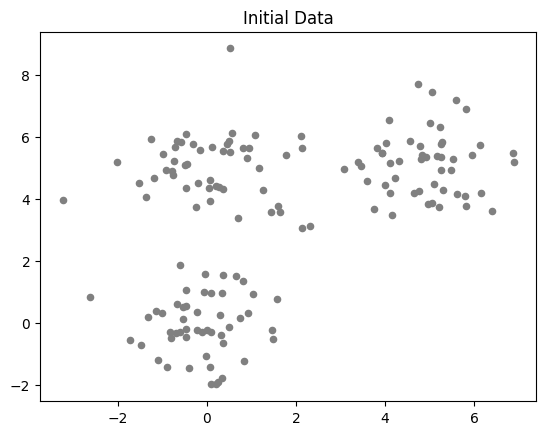

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=20, color='gray')
plt.title("Initial Data")
plt.show()

#### Initialize Parameters

In [25]:
k = 3  # Number of clusters
centroids = X[np.random.choice(range(len(X)), k, replace=False)]  # Random initial centroids

In [26]:
def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

#### K-Means Algorithm

In [27]:
p_value = 3
max_iters = 100
for _ in range(max_iters):
    # Assign clusters
    labels = []
    for point in X:
        distances = [minkowski_distance(point, centroid, p_value) for centroid in centroids]
        labels.append(np.argmin(distances))
    labels = np.array(labels)

    # Update centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # If centroids don't change, stop
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

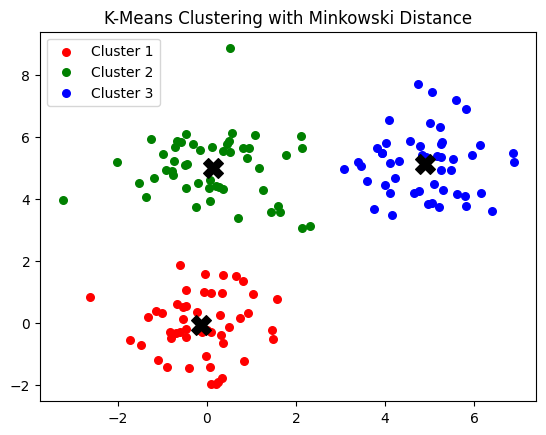

In [28]:
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s=200, color='black', marker='X')

plt.title("K-Means Clustering with Minkowski Distance")
plt.legend()
plt.show()
